In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Best way to read in data with time series index!
df = pd.read_csv('data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

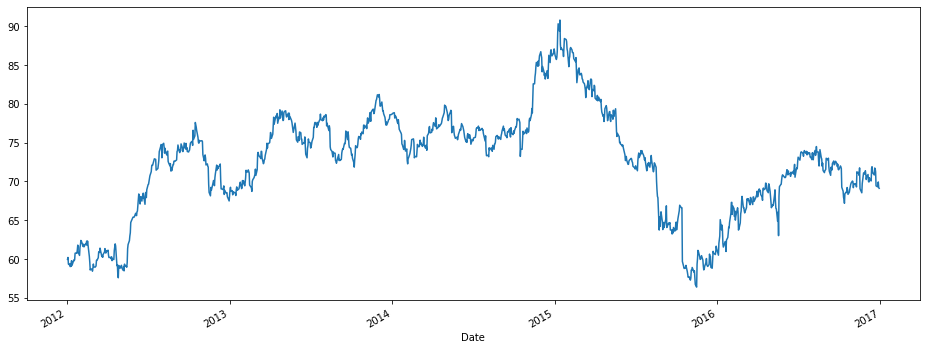

In [5]:
df['Open'].plot(figsize=(16,6))

In [6]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

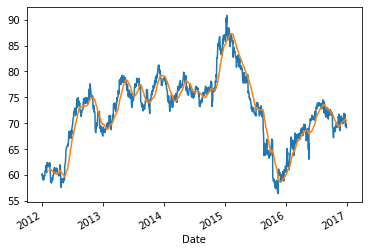

In [7]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

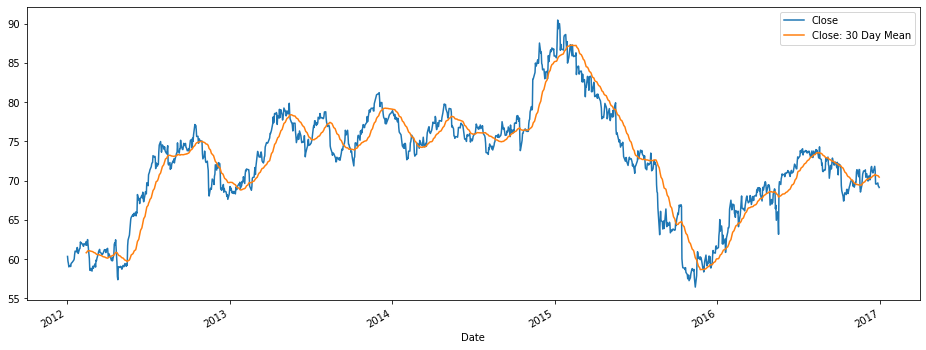

In [8]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

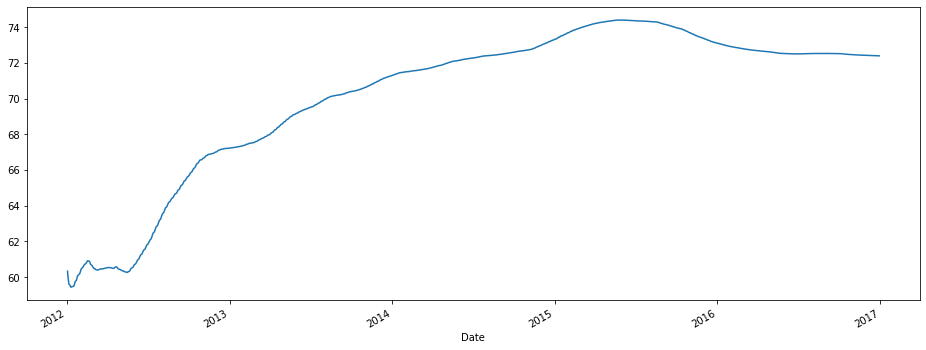

In [9]:
# Optional specify a minimum number of periods
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

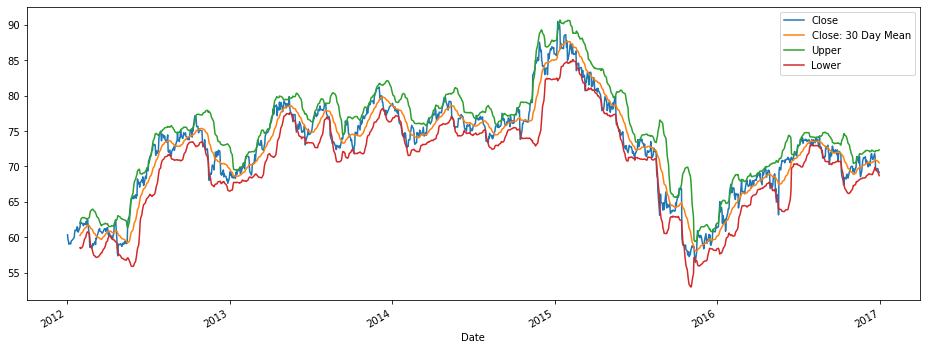

In [10]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))